# Covid-19 Vaccine Distribution Plan

In [1]:
'''Save "us_state_vaccinations.csv" and "states.csv" to the local disk before running this code '''

In [2]:
import pandas as pd
import numpy as np

## Reading, Cleaning and Pre-processing US Vaccination Data

In [3]:
data = pd.read_csv("us_state_vaccinations.csv")
data.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [4]:
# Select columns date, location, and total_distributed vaccines
# total_distributed = cumulative counts of COVID-19 vaccine doses recorded as shipped in CDC's Vaccine Tracking System.
df = data[["date", "location", "total_distributed"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

<ipython-input-4-1d2903604082>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


,date,location,total_distributed
0,2021-01-12,Alabama,377025.0
1,2021-01-13,Alabama,378975.0
2,2021-01-14,Alabama,435350.0
3,2021-01-15,Alabama,444650.0
4,2021-01-16,Alabama,NaN


In [5]:
# We only keep the 50 states and DC
df["location"].unique()
df = df[df["location"] != 'American Samoa']
df = df[df["location"] != 'Dept of Defense']
df = df[df["location"] != 'Bureau of Prisons']
df = df[df["location"] != 'Federated States of Micronesia']
df = df[df["location"] != 'Guam']
df = df[df["location"] != 'Indian Health Svc']
df = df[df["location"] != 'Marshall Islands']
df = df[df["location"] != 'Northern Mariana Islands']
df = df[df["location"] != 'Puerto Rico']
df = df[df["location"] != 'Republic of Palau']
df = df[df["location"] != 'United States']
df = df[df["location"] != 'Veterans Health']
df = df[df["location"] != 'Virgin Islands']
df = df[df["location"] != 'Long Term Care']
df["location"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York State', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [6]:
# fill NaN values in total_distributed with the previous value 
# Ex: If 2021-01-16 is missing, then fill that with the value from 2021-01-15
df.fillna(method='ffill', inplace = True)
df.head(10)

,date,location,total_distributed
0,2021-01-12,Alabama,377025.0
1,2021-01-13,Alabama,378975.0
2,2021-01-14,Alabama,435350.0
3,2021-01-15,Alabama,444650.0
4,2021-01-16,Alabama,444650.0
5,2021-01-17,Alabama,444650.0
6,2021-01-18,Alabama,444650.0
7,2021-01-19,Alabama,444650.0
8,2021-01-20,Alabama,483275.0
9,2021-01-21,Alabama,493125.0


In [7]:
# Apply pivot operation
# All states become the columns and each row is the distributed vaccine on each date
df = df.pivot(index = 'date', columns='location', values='total_distributed')
df.reset_index(inplace=True)
df.head()

location,date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2021-01-12,377025.0,141600.0,563025.0,274400.0,3286050.0,516750.0,250775.0,88325.0,62725.0,...,83500.0,485800.0,1949125.0,256275.0,64925.0,797150.0,567725.0,160975.0,429500.0,47800.0
1,2021-01-13,378975.0,149475.0,569525.0,297800.0,3435650.0,530800.0,315025.0,91250.0,68325.0,...,88375.0,598000.0,1984225.0,266025.0,69800.0,845900.0,572600.0,160975.0,435900.0,57800.0
2,2021-01-14,435350.0,150450.0,570625.0,297800.0,3540175.0,531775.0,328675.0,91250.0,68325.0,...,88375.0,656550.0,2105600.0,267975.0,69800.0,852725.0,655575.0,160975.0,437900.0,58775.0
3,2021-01-15,444650.0,150450.0,571725.0,297800.0,3548575.0,531775.0,328775.0,91250.0,68325.0,...,93675.0,657550.0,2105600.0,268175.0,74000.0,852725.0,696175.0,205475.0,437900.0,58775.0
4,2021-01-16,444650.0,150450.0,571725.0,297800.0,3548575.0,531775.0,328775.0,91250.0,68325.0,...,93675.0,657550.0,2105600.0,268175.0,74000.0,852725.0,696175.0,205475.0,437900.0,58775.0


## Reading and Preparing Weekly COVID Deaths Data

In [8]:
url = "https://data.cdc.gov/resource/r8kw-7aab.json"
df2 = pd.read_json(url)
df2.head()

,data_as_of,start_date,end_date,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
0,2021-04-21T00:00:00.000,2019-12-29T00:00:00.000,2020-01-04T00:00:00.000,By Week,2019/2020,1,2020-01-04T00:00:00.000,United States,0.0,60163.0,98,4105.0,0.0,434.0,4539.0,NaN
1,2021-04-21T00:00:00.000,2020-01-05T00:00:00.000,2020-01-11T00:00:00.000,By Week,2020,2,2020-01-11T00:00:00.000,United States,0.0,60722.0,97,4152.0,0.0,474.0,4626.0,NaN
2,2021-04-21T00:00:00.000,2020-01-12T00:00:00.000,2020-01-18T00:00:00.000,By Week,2020,3,2020-01-18T00:00:00.000,United States,3.0,59352.0,97,4064.0,3.0,467.0,4531.0,NaN
3,2021-04-21T00:00:00.000,2020-01-19T00:00:00.000,2020-01-25T00:00:00.000,By Week,2020,4,2020-01-25T00:00:00.000,United States,1.0,59152.0,99,3917.0,0.0,499.0,4417.0,NaN
4,2021-04-21T00:00:00.000,2020-01-26T00:00:00.000,2020-02-01T00:00:00.000,By Week,2020,5,2020-02-01T00:00:00.000,United States,0.0,58823.0,99,3817.0,0.0,481.0,4298.0,NaN


In [9]:
# Select only the number of weekly deaths in the whole country
df2 = df2[df2["state"] == "United States"]
df2 = df2[["end_date", "covid_19_deaths"]]
df2 = df2.rename(columns={'end_date':'date'})
df2["date"] = pd.to_datetime(df2["date"])
df2.head()

,date,covid_19_deaths
0,2020-01-04,0.0
1,2020-01-11,0.0
2,2020-01-18,3.0
3,2020-01-25,1.0
4,2020-02-01,0.0


### Find the Cumulative Sum of Weekly Deaths

In [10]:
# Select only dates for which we have vaccination data
# The covid-19 deaths for each date indicates the number of deaths during the week of this date
df2 = df2.iloc[-13:,:]
df2.reset_index(drop = True)
df2['covid_19_deaths'] = df2['covid_19_deaths'].cumsum()
df2

,date,covid_19_deaths
55,2021-01-23,22149.0
56,2021-01-30,41296.0
57,2021-02-06,57348.0
58,2021-02-13,69997.0
59,2021-02-20,80087.0
60,2021-02-27,88090.0
61,2021-03-06,94278.0
62,2021-03-13,99414.0
63,2021-03-20,103616.0
64,2021-03-27,107146.0


## Merge COVID Deaths Data and Vaccination Data

In [11]:
# Merge two data frame with the common dates
df = df.merge(df2, how='inner', on='date').drop('date', axis=1)
df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,covid_19_deaths
0,521225.0,155700.0,829500.0,368650.0,4906525.0,692700.0,492850.0,116325.0,91025.0,2908275.0,...,838825.0,3070825.0,341725.0,90000.0,1069725.0,846625.0,243100.0,610100.0,70750.0,22149.0
1,659400.0,193150.0,1013375.0,453700.0,5666150.0,813400.0,578600.0,143775.0,148525.0,3396350.0,...,998875.0,3659550.0,401375.0,99750.0,1232350.0,1031400.0,305200.0,795050.0,85750.0,41296.0
2,804100.0,248500.0,1186000.0,540050.0,6963500.0,991075.0,740300.0,161525.0,166950.0,3791925.0,...,1156975.0,4402275.0,493525.0,116075.0,1387775.0,1208600.0,357000.0,926300.0,101650.0,57348.0
3,963600.0,271550.0,1393475.0,630700.0,8051475.0,1210475.0,847200.0,188075.0,193900.0,4441375.0,...,1357425.0,5098825.0,579700.0,138025.0,1596425.0,1437825.0,395600.0,1082100.0,122000.0,69997.0
4,1078800.0,299935.0,1688255.0,691525.0,9178020.0,1348800.0,984275.0,204200.0,225125.0,5120975.0,...,1477175.0,5602100.0,658750.0,159650.0,1948550.0,1619340.0,481225.0,1301825.0,150905.0,80087.0
5,1402180.0,342535.0,2148015.0,892660.0,11587650.0,1700660.0,1198495.0,291815.0,284655.0,6313255.0,...,1965740.0,7615175.0,820950.0,206910.0,2536495.0,2245010.0,605255.0,1588665.0,195855.0,88090.0
6,1628350.0,426715.0,2623735.0,1088150.0,13885120.0,2019460.0,1434565.0,361765.0,337095.0,7771315.0,...,2305870.0,9250505.0,993140.0,261100.0,2881325.0,2657880.0,723565.0,1924765.0,236065.0,94278.0
7,1918560.0,472395.0,3024585.0,1251620.0,16376020.0,2345060.0,1659085.0,422015.0,388865.0,9145275.0,...,2718400.0,10967665.0,1144940.0,292890.0,3291575.0,3132270.0,823965.0,2233235.0,270015.0,99414.0
8,2177880.0,520685.0,3461245.0,1466950.0,18875980.0,2684110.0,1899395.0,486095.0,445625.0,10691345.0,...,3145950.0,12613635.0,1321750.0,342960.0,3820055.0,3586880.0,939515.0,2614965.0,314015.0,103616.0
9,2535880.0,570465.0,3970345.0,1662850.0,21865730.0,3060410.0,2211275.0,555005.0,491635.0,12219465.0,...,3554800.0,14660795.0,1500500.0,393330.0,4489825.0,4114320.0,1067635.0,2996415.0,353975.0,107146.0


In [12]:
df['Vaccination_in_all_US'] = df.drop('covid_19_deaths', axis=1).sum(axis=1)
df

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,covid_19_deaths,Vaccination_in_all_US
0,521225.0,155700.0,829500.0,368650.0,4906525.0,692700.0,492850.0,116325.0,91025.0,2908275.0,...,3070825.0,341725.0,90000.0,1069725.0,846625.0,243100.0,610100.0,70750.0,22149.0,38710725.0
1,659400.0,193150.0,1013375.0,453700.0,5666150.0,813400.0,578600.0,143775.0,148525.0,3396350.0,...,3659550.0,401375.0,99750.0,1232350.0,1031400.0,305200.0,795050.0,85750.0,41296.0,46636900.0
2,804100.0,248500.0,1186000.0,540050.0,6963500.0,991075.0,740300.0,161525.0,166950.0,3791925.0,...,4402275.0,493525.0,116075.0,1387775.0,1208600.0,357000.0,926300.0,101650.0,57348.0,55258700.0
3,963600.0,271550.0,1393475.0,630700.0,8051475.0,1210475.0,847200.0,188075.0,193900.0,4441375.0,...,5098825.0,579700.0,138025.0,1596425.0,1437825.0,395600.0,1082100.0,122000.0,69997.0,65121800.0
4,1078800.0,299935.0,1688255.0,691525.0,9178020.0,1348800.0,984275.0,204200.0,225125.0,5120975.0,...,5602100.0,658750.0,159650.0,1948550.0,1619340.0,481225.0,1301825.0,150905.0,80087.0,73975515.0
5,1402180.0,342535.0,2148015.0,892660.0,11587650.0,1700660.0,1198495.0,291815.0,284655.0,6313255.0,...,7615175.0,820950.0,206910.0,2536495.0,2245010.0,605255.0,1588665.0,195855.0,88090.0,95158790.0
6,1628350.0,426715.0,2623735.0,1088150.0,13885120.0,2019460.0,1434565.0,361765.0,337095.0,7771315.0,...,9250505.0,993140.0,261100.0,2881325.0,2657880.0,723565.0,1924765.0,236065.0,94278.0,114805635.0
7,1918560.0,472395.0,3024585.0,1251620.0,16376020.0,2345060.0,1659085.0,422015.0,388865.0,9145275.0,...,10967665.0,1144940.0,292890.0,3291575.0,3132270.0,823965.0,2233235.0,270015.0,99414.0,134087515.0
8,2177880.0,520685.0,3461245.0,1466950.0,18875980.0,2684110.0,1899395.0,486095.0,445625.0,10691345.0,...,12613635.0,1321750.0,342960.0,3820055.0,3586880.0,939515.0,2614965.0,314015.0,103616.0,154764645.0
9,2535880.0,570465.0,3970345.0,1662850.0,21865730.0,3060410.0,2211275.0,555005.0,491635.0,12219465.0,...,14660795.0,1500500.0,393330.0,4489825.0,4114320.0,1067635.0,2996415.0,353975.0,107146.0,178431875.0


## Weekly Vaccine Distribution Plan to Each State

In [13]:
# Read "states.csv" which includes estimated COVID deaths in each state
data3 = pd.read_csv("states.csv")
data3.loc[20, "state_name"] = 'New York State'

data3 = data3.sort_values(by=['state_name'])

priority = data3["est_deaths"].tolist()
sum_pr = sum(priority)

all_plans = []
vac = df["Vaccination_in_all_US"].tolist()
for j in range(12):
    plan=[]
    for i in priority:
        plan.append(round(i * vac[j] / sum_pr))
    plan = np.array(plan)
    plan = plan.reshape(1, -1)
    all_plans.append(plan)
    
# The alphabetic order of 12 weeks vaccine distribution plan for each state
all_plans

[array([[ 636333,   69080,  887481,  385214, 3938610,  579654,  462867,
          136825,   70485, 3075162, 1153019,  205163,  204657, 1490756,
          795969,  408937,  348963,  545657,  562268,  203854,  741101,
          853747, 1307773,  691275,  372577,  788705,  147374,  229636,
          342083,  184852, 1069964,  218549, 2378309, 1294208,   91191,
         1519581,  467377,  533856, 1770387,  134971,  684007,  112605,
          840264, 2447378,  264615,   87613, 1022581,  870647,  261945,
          751605,   68996]]),
 array([[ 766625,   83224, 1069196,  464088, 4745056,  698340,  557640,
          164840,   84917, 3704814, 1389104,  247171,  246562, 1795995,
          958947,  492669,  420415,  657382,  677394,  245593,  892845,
         1028555, 1575544,  832817,  448864,  950196,  177549,  276655,
          412126,  222702, 1289043,  263298, 2865277, 1559202,  109863,
         1830721,  563074,  643165, 2132881,  162606,  824060,  135661,
         1012312, 2948488,  318796

## Split Data into Training and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:51].values
y = df.iloc[:, 51].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=242)

### Train the Random Forest Model and Test Its Accuracy

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regr = RandomForestRegressor(n_estimators = 200, max_features = "sqrt", random_state=242)
y_pred = regr.fit(X_train, y_train).predict(X_test)
print('R-squared of Random Forest Regressor is:', round(metrics.r2_score(y_test, y_pred),2))  

R-squared of Random Forest Regressor is: 0.97


### Predict the Cumulative COVID Deaths with the Vacccine Allocation Plan

In [16]:
death_rates = df["covid_19_deaths"].tolist()
death_estimate = []
for plan in all_plans:
    death_estimate.append(round(regr.fit(X_train, y_train).predict(plan)[0]))
    
death_est = pd.DataFrame(death_estimate)
death_est.columns = ['Death estimate under our vaccine distribution plan']
new_df = df2.reset_index(drop = True)
new_df = new_df.loc[:11, :]
result = pd.concat([new_df, death_est], axis=1)
result

,date,covid_19_deaths,Death estimate under our vaccine distribution plan
0,2021-01-23,22149.0,34699
1,2021-01-30,41296.0,43785
2,2021-02-06,57348.0,53785
3,2021-02-13,69997.0,67062
4,2021-02-20,80087.0,74579
5,2021-02-27,88090.0,85030
6,2021-03-06,94278.0,92665
7,2021-03-13,99414.0,96549
8,2021-03-20,103616.0,102545
9,2021-03-27,107146.0,105462


<AxesSubplot:xlabel='date'>

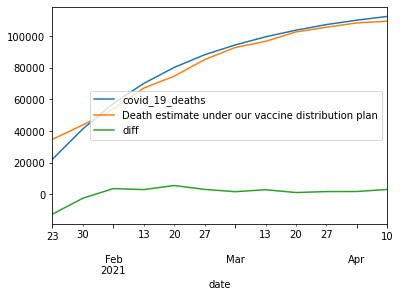

In [17]:
result['diff'] = result['covid_19_deaths'] - result['Death estimate under our vaccine distribution plan']
result.plot.line(x = 'date')